## Bias-Complexity Trade-off

In this exercise we give a simple illustration of the bias-complexity trade-off.

Recall the error decomposition into the *estimation error* $\epsilon_{\mathrm{est}}$, and the *approximation error* $\epsilon_{\mathrm{app}}
= \min_{h \in \mathcal{H}} L_D(h)$.

The bias-complexity tradeoff states that choosing $\mathcal{H}$ to be a rich class decreases the approximation error
but may increase the estimation error (as it may lead to over-fitting, e.g. modelling the noise in the data). On the other hand, choosing $\mathcal{H}$ to be a small set this may increase the approximation error (underfitting).

In this exercise, we will demonstrate the bias-complexity trade-off for the example of a polynomial function fitting. The data is generated by drawing $x$ from a distribution and defining $y = f(x)$ where $f(x)$ is a polynomial function. We will consider $(x,y)$ examples generated such that $y$ is equal to the sum of $f(x)$ and an additive noise. The hypothesis class $\mathcal{H}$ consists of polynomial functions. 

### Polynomial regression

We are going to illustrate the trade-off on the example of polynomial regression.

#### Tools

For regression, we use `numpy` and its built-in `polyfit` method that applies least-square regression to find the best
polynomial fit of predefined degree to the data points.


In [23]:
import numpy as np
import matplotlib.pyplot as plt

As a simple warmup we first generate some data and fit polynomials of several degrees to it.

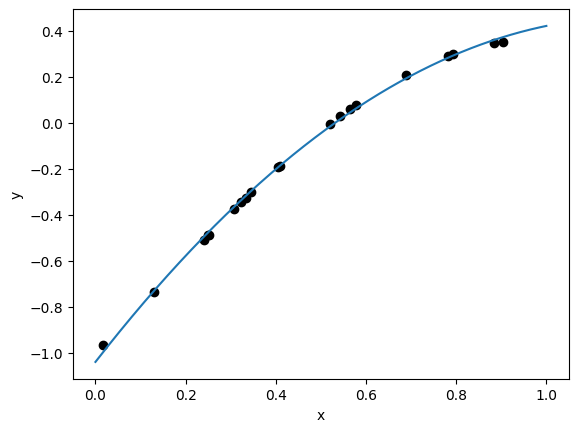

In [24]:
degree = 2
x = np.random.random(20)
y = np.sin(2 * x) - np.cos(x)
p = np.polyfit(x, y, degree)

def plot_fit(x, y, p):
    xfit = np.linspace(0, 1, 1000)
    yfit = np.polyval(p, xfit)
    plt.scatter(x, y, c='k')
    plt.plot(xfit, yfit)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


plot_fit(x, y, p)

Now that we are familiarized with basic plotting and polynomial manipulation in matplotlib/numpy
let us move on to polynomial regression.

In [25]:
def generate_random_data(polynomial, data, err=0.5):
    values = np.polyval(polynomial, data)
    return np.random.normal(values, err)

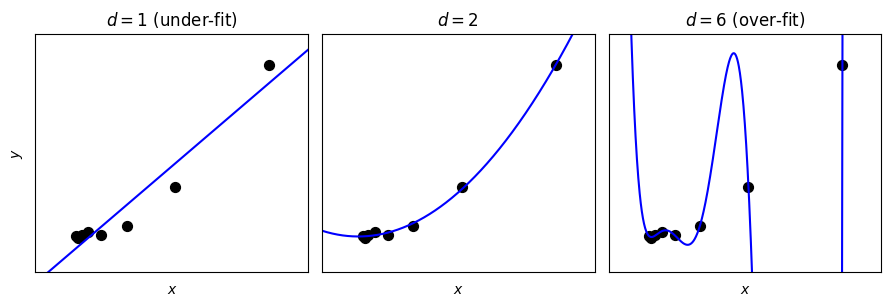

In [26]:
# Mean squared error
def compute_loss(x, y, p):
    yfit = np.polyval(p, x)
    return np.sqrt(np.mean((y - yfit) ** 2))

N = 8
np.random.seed(42)
x = 10 ** np.linspace(-2, 0, N)
square_poly = np.poly1d((1,0,0))
y = generate_random_data(square_poly, x,.02)


xfit = np.linspace(-0.2, 1.2, 1000)

titles = ['$d = 1$ (under-fit)', '$d = 2$', '$d = 6$ (over-fit)']
degrees = [1, 2, 6]

plt.figure(figsize=(9, 3.5))
plt.subplots_adjust(left=0.05, right=0.99,
                    bottom=0.16, top=0.84,
                    wspace=0.05)
for i, d in enumerate(degrees):
    plt.subplot(131 + i, xticks=[], yticks=[])
    plt.scatter(x, y, c='k', s=50)

    p = np.polyfit(x, y, d)
    yfit = np.polyval(p, xfit)
    plt.plot(xfit, yfit, '-b')

    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.xlabel('$x$')
    if i == 0:
        plt.ylabel('$y$')

    plt.title(titles[i])
plt.show()

Here, the data points stem from a polynomial of degree 2 with small added noise. While $d=1$ is under-fitting the data, $d = 6$ models the noise as well, so we see the classical oscillating behaviour of high degree polynomials. Note that if we remove the small noise, then also the high-degree polynomials do not overfit.

Now let us move on to computing the bias-complexity trade-off for polynomial regression applied to a small sample size generates polynomials of arbitrary degree (Chebyshev polynomials are used to sample more stable data). The true error is then measured on the test data.

The variable `true_degree` is the degree of the polynomial of which we sample the data (function $f(x))$.

Our hypothesis class are $\mathcal{H}_1, \ldots, \mathcal{H}_{k}$, where $k$ is set to `max_degree`.
$\mathcal{H}_i$ is the class of polynomials of degree $i$.

In [27]:
Nsample = 30
Nhidden = 2000
error_ratio = .05
true_degree = 4
max_degree = 15

In [28]:
def generate_random_polynomial(degree=2):
    coeff = np.random.random(degree + 1)
    return np.polynomial.chebyshev.cheb2poly(coeff)

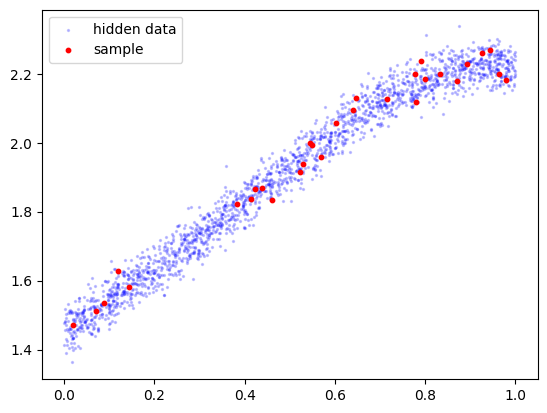

In [29]:
p = generate_random_polynomial(true_degree)

test_y = generate_random_data(p, x, err=0)

error = error_ratio * (np.max(test_y) - np.min(test_y))
# randomly sample the data
np.random.seed(0)
x = np.random.random(Nsample + Nhidden)
y = generate_random_data(p, x, error)

# select training set
# data is already random, so we can just choose a slice.
xsample = x[:Nsample]
ysample = y[:Nsample]

# select cross-validation set
xhidden = x[Nsample:Nsample + Nhidden]
yhidden = y[Nsample:Nsample + Nhidden]

plt.figure()
plt.scatter(xhidden, yhidden, color='blue', alpha=.2, label='hidden data', s = 2)
plt.scatter(xsample, ysample, color='red', label='sample',  s=10)
plt.legend()
plt.show()

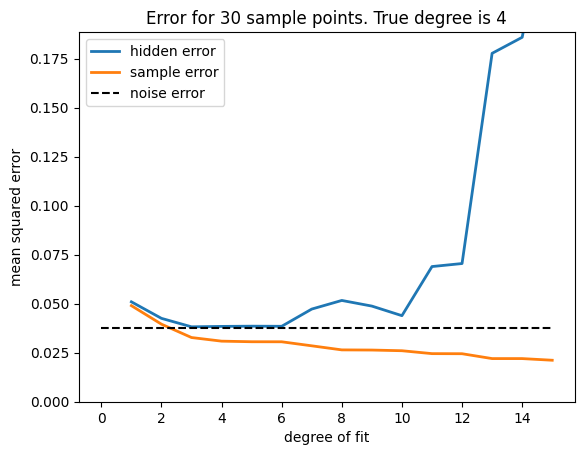

In [30]:
degrees = np.arange(1, max_degree + 1)
sample_error = np.zeros(len(degrees))
hidden_error = np.zeros(len(degrees))
test_err = np.zeros(len(degrees))

for i, d in enumerate(degrees):
    p = np.polyfit(xsample, ysample, d)

    sample_error[i] = compute_loss(xsample, ysample, p)
    hidden_error[i] = compute_loss(xhidden, yhidden, p)

plt.figure()
plt.title("Error for {} sample points. True degree is {}".format(Nsample, true_degree))
plt.plot(degrees, hidden_error, lw=2, label='hidden error')
plt.plot(degrees, sample_error, lw=2, label='sample error')
plt.plot([0, max_degree], [error, error], '--k', label='noise error')

plt.legend()
plt.xlabel('degree of fit')
plt.ylabel('mean squared error')
plt.ylim(0, 5 * error)
plt.show()

### Observations

We clearly observe that the richer the hypothesis class, the smaller the training error. 

However, this is at the expense of over-fitting (the larger the test error).

### To probe further

* You may experiment and evaluate the effect of the noise on the overfitting
* You may repeat evaluation for different training data sizes and check the effect on the overfitting